# Classification of High vs. Low Engagement

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle('YTData.pkl')

In [3]:
#Combining text features for analysis
df['combined_text'] = df['title_keywords_str'] + ' ' + df['description_keywords_str']

## Features Selected wrt Business

##### duration & duration_category -> length of the video
##### upload hour -> what time of the day the video is uploaded 
##### title_length -> length of the video title 
##### description length -> length of the video description 
##### day_of_week -> which day of the week was the video uploaded
##### is_weekend -> if the video was uploaded on a weekend or not
##### definition -> if the video is hd or sd
##### title & description keywords -> to match the relvant keywords

In [4]:
del df['video_id']
del df['title']
del df['description']
del df['upload_date']
del df['view_count']
del df['like_count']
del df['comment_count']
del df['average_view_duration']
del df['subscribers_gained']
del df['subscribers_lost']
del df['upload_day']
del df['upload_month']
del df['upload_year']
del df['likes_to_views_ratio']
del df['comments_to_views_ratio']
del df['likes_to_comments_ratio']
del df['net_subscribers_gained']
del df['engagement_score']
del df['definition_numeric']
del df['title_keywords']
del df['description_keywords']
del df['title_keywords_str']
del df['description_keywords_str']
del df['upload_date_only']
del df['day_name']
del df['weekend_weekday']

In [5]:
#One-hot encoding for the revelant categorical features
selected_columns = ['definition', 'duration_category','day_of_week']

df = pd.get_dummies(df, columns=selected_columns)

In [6]:
df['definition_hd'] = df['definition_hd'].astype(int)
df['duration_category_short'] = df['duration_category_short'].astype(int)
df['duration_category_medium'] = df['duration_category_medium'].astype(int)
df['day_of_week_0'] = df['day_of_week_0'].astype(int)
df['day_of_week_1'] = df['day_of_week_1'].astype(int)
df['day_of_week_2'] = df['day_of_week_2'].astype(int)
df['day_of_week_3'] = df['day_of_week_3'].astype(int)
df['day_of_week_4'] = df['day_of_week_4'].astype(int)
df['day_of_week_5'] = df['day_of_week_5'].astype(int)

In [7]:
#'n' categories then n-1 dummy variables to be created hence removing the extra ones
del df['definition_sd']
del df['duration_category_long']
del df['day_of_week_6']

In [8]:
df

,duration,upload_hour,is_weekend,engagement_category,title_length,description_length,combined_text,definition_hd,duration_category_short,duration_category_medium,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5
0,59,6,0,High,29,13,types Rank Pushers CODM codm shorts,1,1,0,0,0,0,0,1,0
1,38,9,0,Low,32,13,Evolution COD Games Mobile codm shorts,1,1,0,1,0,0,0,0,0
2,58,7,0,Low,42,24,Invisibility Glitch Counter CODM codm codmobil...,1,1,0,0,1,0,0,0,0
3,57,11,0,Low,37,5,MOST annoying thing CODM right Empty,1,1,0,1,0,0,0,0,0
4,37,6,0,Low,41,13,thought bad day codm shorts,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,33,4,0,Low,34,13,Most RAREST Emotes I Own In CODM codm shorts,1,1,0,0,1,0,0,0,0
305,166,7,0,Low,41,34,THIS BUILD HELPED ME NUKE TRYHARDS codm callof...,1,0,1,1,0,0,0,0,0
306,49,8,0,High,34,13,I get gaming chair codm shorts,1,1,0,1,0,0,0,0,0
307,261,4,0,Low,47,5,CODM Legendary Ranked Nuke No Stress Empty,1,0,1,1,0,0,0,0,0


In [9]:
features = ['duration','upload_hour','title_length','description_length','is_weekend','definition_hd','duration_category_short','duration_category_medium','day_of_week_0','day_of_week_1','day_of_week_2','day_of_week_3','day_of_week_4','day_of_week_5']

In [10]:
df[features].corr()

,duration,upload_hour,title_length,description_length,is_weekend,definition_hd,duration_category_short,duration_category_medium,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5
duration,1.000000,0.279988,0.273221,0.506342,-0.028776,0.080436,-7.866983e-01,0.471620,0.060800,0.011039,0.089460,-0.030146,-0.097051,-3.537735e-02
upload_hour,0.279988,1.000000,-0.084251,0.223250,0.072838,-0.060304,-2.092861e-01,0.127981,0.063614,-0.063290,0.028273,-0.067252,-0.052804,2.664109e-02
title_length,0.273221,-0.084251,1.000000,0.216941,-0.062921,0.054724,-2.363853e-01,0.125412,0.013630,0.126021,-0.076654,0.038686,-0.024061,-1.571382e-02
description_length,0.506342,0.223250,0.216941,1.000000,0.019120,0.047088,-4.943415e-01,0.367925,0.036115,-0.028320,-0.022406,-0.051118,0.040554,3.374008e-02
is_weekend,-0.028776,0.072838,-0.062921,0.019120,1.000000,0.017808,-9.949879e-03,0.048656,-0.249004,-0.252251,-0.249004,-0.235837,-0.249004,6.617173e-01
definition_hd,0.080436,-0.060304,0.054724,0.047088,0.017808,1.000000,-8.522865e-02,0.074496,-0.018230,0.055403,0.054690,-0.099807,-0.018230,5.106429e-02
duration_category_short,-0.786698,-0.209286,-0.236385,-0.494341,-0.009950,-0.085229,1.000000e+00,-0.874078,-0.071299,-0.024226,0.010186,0.027529,0.071299,4.513750e-17
duration_category_medium,0.471620,0.127981,0.125412,0.367925,0.048656,0.074496,-8.740777e-01,1.000000,0.041146,0.035483,-0.045477,-0.047575,-0.045477,2.578055e-02
day_of_week_0,0.060800,0.063614,0.013630,0.036115,-0.249004,-0.018230,-7.129877e-02,0.041146,1.000000,-0.178771,-0.176471,-0.167139,-0.176471,-1.647705e-01
day_of_week_1,0.011039,-0.063290,0.126021,-0.028320,-0.252251,0.055403,-2.422567e-02,0.035483,-0.178771,1.000000,-0.178771,-0.169318,-0.178771,-1.669188e-01


In [11]:
correlation_matrix = df[features].corr()
correlation_threshold = 0.8

#Finding highly correlated features
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

#Displaying the highly correlated features
print("Highly Correlated Features:", highly_correlated_features)

Highly Correlated Features: {'duration_category_medium'}


From the above, removing variables with 0.8 or -0.8 to avoid multicollinearity, hence, removing duration_category_medium.

In [12]:
del df['duration_category_medium']

In [13]:
df

,duration,upload_hour,is_weekend,engagement_category,title_length,description_length,combined_text,definition_hd,duration_category_short,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5
0,59,6,0,High,29,13,types Rank Pushers CODM codm shorts,1,1,0,0,0,0,1,0
1,38,9,0,Low,32,13,Evolution COD Games Mobile codm shorts,1,1,1,0,0,0,0,0
2,58,7,0,Low,42,24,Invisibility Glitch Counter CODM codm codmobil...,1,1,0,1,0,0,0,0
3,57,11,0,Low,37,5,MOST annoying thing CODM right Empty,1,1,1,0,0,0,0,0
4,37,6,0,Low,41,13,thought bad day codm shorts,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,33,4,0,Low,34,13,Most RAREST Emotes I Own In CODM codm shorts,1,1,0,1,0,0,0,0
305,166,7,0,Low,41,34,THIS BUILD HELPED ME NUKE TRYHARDS codm callof...,1,0,1,0,0,0,0,0
306,49,8,0,High,34,13,I get gaming chair codm shorts,1,1,1,0,0,0,0,0
307,261,4,0,Low,47,5,CODM Legendary Ranked Nuke No Stress Empty,1,0,1,0,0,0,0,0


In [14]:
missing_value = df.isnull().sum()
print(missing_value)

duration                   0
upload_hour                0
is_weekend                 0
engagement_category        0
title_length               0
description_length         0
combined_text              0
definition_hd              0
duration_category_short    0
day_of_week_0              0
day_of_week_1              0
day_of_week_2              0
day_of_week_3              0
day_of_week_4              0
day_of_week_5              0
dtype: int64


In [15]:
#Converting 'engagement_category' to numerical values
df['engagement_category'] = df['engagement_category'].map({'Low': 0, 'High': 1})

# Model Selection

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV

In [17]:
#Vectorizing 'combined_text' using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X_text = vectorizer.fit_transform(df['combined_text'])

#Setting the features (X) and target variable (y)
X_numeric = df.drop(['engagement_category', 'combined_text'], axis=1)
X_text_df = pd.DataFrame(X_text.toarray(), index=df.index)  # Ensure index alignment
X = pd.concat([X_numeric, X_text_df], axis=1)
y = df['engagement_category']

In [18]:
#Splitting the data
X.columns = X.columns.astype(str)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
#Applying SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [20]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'SVM': SVC(probability=True),  # Ensure probability=True for ROC/AUC
    'GaussianNB': GaussianNB(),
    'LDA': LinearDiscriminantAnalysis(),
    'MultinomialNB': MultinomialNB()
}


In [21]:
#Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [23]:
evaluation_results = []

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name, scaled=False):
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    
    #Calculating metrics
    accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred_test, average='weighted')
    f1 = f1_score(y_test, y_pred_test, average='weighted')
    
    #Storing results in the list
    evaluation_results.append({
        'model': model_name,
        'scaled': scaled,
        'test_accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    })

In [24]:
for name, model in models.items():
    #Non-scaled
    evaluate_model(model, X_train_smote, y_train_smote, X_test, y_test, name)

    #Scaled 
    if name not in ['GaussianNB', 'MultinomialNB']:  # GaussianNB and MultinomialNB do not require scaling
        evaluate_model(model, X_train_scaled_smote, y_train_smote, X_test_scaled, y_test, name, scaled=True)

#Converting the results list to a DataFrame
test_data = pd.DataFrame(evaluation_results)

In [25]:
test_data

,model,scaled,test_accuracy,precision,recall,f1_score
0,LogisticRegression,False,0.633333,0.618194,0.633333,0.622978
1,LogisticRegression,True,0.616667,0.596307,0.616667,0.602312
2,KNN,False,0.733333,0.758923,0.733333,0.738889
3,KNN,True,0.550000,0.803125,0.550000,0.518926
4,DecisionTree,False,0.583333,0.578750,0.583333,0.580889
5,DecisionTree,True,0.666667,0.644845,0.666667,0.642955
6,RandomForest,False,0.650000,0.653947,0.650000,0.651797
7,RandomForest,True,0.650000,0.632955,0.650000,0.636894
8,GradientBoosting,False,0.683333,0.695139,0.683333,0.687556
9,GradientBoosting,True,0.650000,0.632955,0.650000,0.636894


### KNN	False	0.733333	0.758923	0.733333	0.738889 -> best result 

### Model Selection for Hyper-parameter Tuning

KNN (K-Nearest Neighbors): It performed well (0.7333 accuracy), especially in the non-scaled version.

GradientBoosting: This model also shows promising results with an accuracy of 0.6833.

AdaBoost: With an accuracy of 0.6833, AdaBoost is another strong candidate.

GaussianNB (Gaussian Naive Bayes): It achieved a decent accuracy of 0.6833 and might benefit from tuning.

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [33]:
model_params = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [4],  #Only 4 based on results
            'weights': ['uniform', 'distance'],  
            'metric': ['euclidean', 'manhattan']  
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [200, 225],  #Reduced range around best results - after couple of interations
            'learning_rate': [0.15, 0.25],  # Narrowed range
            'max_depth': [3, 4]  # Narrowed range
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(),
        'params': {
            'n_estimators': [150, 175],  #Reduced range - after couple of interations
            'learning_rate': [0.05, 0.075]  #Reduced range - after couple of interations
        }
    },
    'GaussianNB': {
        'model': GaussianNB(),
        'params': {
            'var_smoothing': [1e-09]  #Directly used the best result from previous iterations
        }
    }
}

models = {
    'KNN': KNeighborsClassifier,
    'GradientBoosting': GradientBoostingClassifier,
    'AdaBoost': AdaBoostClassifier,
    'GaussianNB': GaussianNB
}

In [34]:
#Function to perform Grid Search and return estimator and parameters
def perform_grid_search(model_name, model, params, X_train, y_train):
    clf = GridSearchCV(model, params, cv=5, scoring='accuracy', verbose=1)
    clf.fit(X_train, y_train)
    return clf.best_estimator_, clf.best_params_

In [35]:
#Storing best estimators and their parameters
best_estimators = []

#Performing Grid Search for each model on both scaled and non-scaled data
for model_name in ['KNN', 'GradientBoosting', 'AdaBoost', 'GaussianNB']:
    # Non-scaled data
    model = models[model_name]()  #Initializing the model
    best_estimator_ns, best_params_ns = perform_grid_search(model_name, model, model_params[model_name]['params'], 
                                                            X_train_smote, y_train_smote)
    best_estimators.append((model_name, 'Non-Scaled', best_estimator_ns, best_params_ns))

    #Scaled data - Check if model supports scaling
    if model_name not in ['GaussianNB']:  
        best_estimator_s, best_params_s = perform_grid_search(model_name, model, model_params[model_name]['params'], 
                                                              X_train_scaled_smote, y_train_smote)
        best_estimators.append((model_name, 'Scaled', best_estimator_s, best_params_s))

#Evaluating best estimators on test data
test_scores = []
for model_name, data_type, estimator, params in best_estimators:
    y_pred_test = estimator.predict(X_test_scaled if data_type == 'Scaled' else X_test)
    accuracy = accuracy_score(y_test, y_pred_test)
    test_scores.append({
        'model': model_name,
        'scaled': data_type,
        'test_accuracy': accuracy,
        'best_params': params
    })

#Converting test scores to a DataFrame
test_df = pd.DataFrame(test_scores)
print(test_df)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
              model      scaled  test_accuracy  \
0               KNN  Non-Scaled       0.650000   
1               KNN      Scaled       0.583333   
2  GradientBoosting  Non-Scaled       0.666667   
3  GradientBoosting      Scaled       0.666667   
4          AdaBoost  Non-Scaled       0.666667   
5          AdaBoost      Scaled       0.750000   
6        GaussianNB  Non-Scaled       0.683333   

                                                        best_params  
0  {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}  
1   {'metric': 'manhattan', 'n_neighbors

In [36]:
pd.set_option('display.max_colwidth', None)

In [37]:
test_df

,model,scaled,test_accuracy,best_params
0,KNN,Non-Scaled,0.650000,"{'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}"
1,KNN,Scaled,0.583333,"{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}"
2,GradientBoosting,Non-Scaled,0.666667,"{'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 200}"
3,GradientBoosting,Scaled,0.666667,"{'learning_rate': 0.25, 'max_depth': 3, 'n_estimators': 225}"
4,AdaBoost,Non-Scaled,0.666667,"{'learning_rate': 0.075, 'n_estimators': 175}"
5,AdaBoost,Scaled,0.750000,"{'learning_rate': 0.075, 'n_estimators': 150}"
6,GaussianNB,Non-Scaled,0.683333,{'var_smoothing': 1e-09}


### AdaBoost	Scaled	0.750000	{'learning_rate': 0.075, 'n_estimators': 150} -> best result after hyper-parameter tuning 

# AdaBoost (Best Model)

	Training: Classification Summary
	--------------------------------------------------
	
Confusion Matrix
	Actual\Predicted	low 	high
	low		153	18
	high		10	161
	
Metrics
	Metric		Value
	Accuracy (#correct)	314
	Accuracy (%correct)	91.81286550
	Specificity		0.89473684
	Sensitivity (Recall)	0.94152047
	Precision		0.89944134
	F1 score		0.92000000
	Success Class		low


	Testing: Classification Summary
	--------------------------------------------------
	
Confusion Matrix
	Actual\Predicted	low 	high
	low		32	7
	high		8	13
	
Metrics
	Metric		Value
	Accuracy (#correct)	45
	Accuracy (%correct)	75.00000000
	Specificity		0.82051282
	Sensitivity (Recall)	0.61904762
	Precision		0.65000000
	F1 score		0.63414634
	Success Class		low




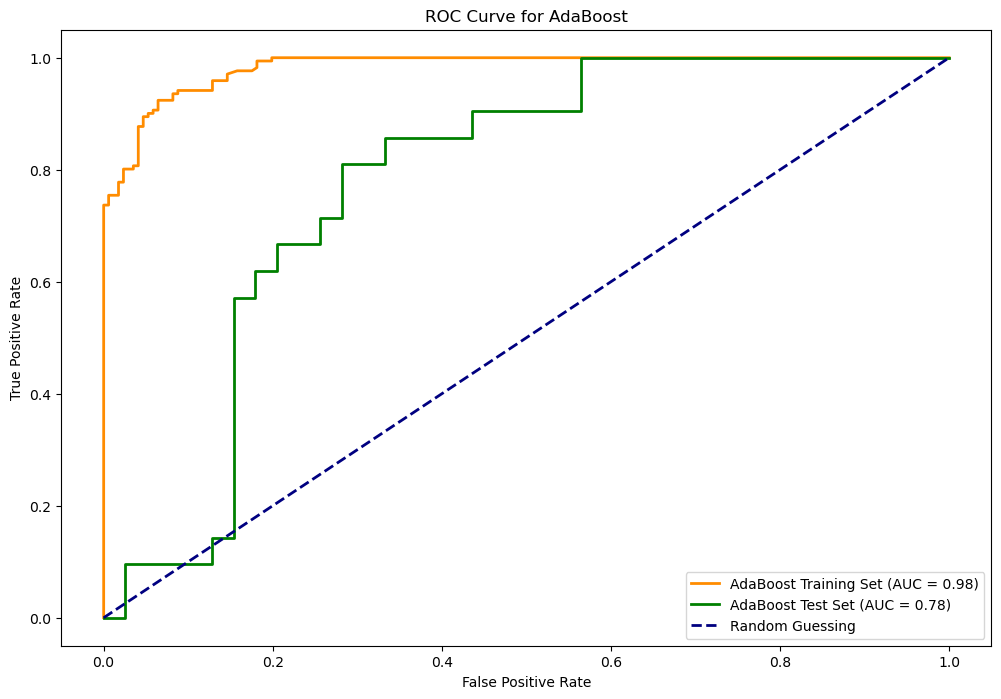

In [52]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

#AdaBoost model with specified parameters (which was found in hyper-parameter tuning)
ada_model = AdaBoostClassifier(learning_rate=0.075, n_estimators=150)
ada_model.fit(X_train_scaled_smote, y_train_smote)

#Predictions for training and test sets
y_pred_train_ada = ada_model.predict(X_train_scaled_smote)
y_pred_test_ada = ada_model.predict(X_test_scaled)

#Predicted probabilities for ROC curve
y_prob_train_ada = ada_model.predict_proba(X_train_scaled_smote)[:, 1]
y_prob_test_ada = ada_model.predict_proba(X_test_scaled)[:, 1]

#Function for printing classification summary
def print_classification_summary(y_true, y_pred, class_labels, dataset_name):
    #Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    #Metrics
    accuracy = accuracy_score(y_true, y_pred)
    specificity = conf_matrix[0, 0] / np.sum(conf_matrix[0, :])
    sensitivity = conf_matrix[1, 1] / np.sum(conf_matrix[1, :])
    precision = precision_score(y_true, y_pred)
    f1_score_value = f1_score(y_true, y_pred)

    #Success Class and Success Probability
    success_class = class_labels[np.argmax(conf_matrix.sum(axis=1))]
    success_probability = conf_matrix[class_labels == success_class, class_labels == success_class].sum() / len(y_true)

    #Printing Classification Summary
    print("\t{}: Classification Summary".format(dataset_name.capitalize()))
    print("\t" + "-" * 50)
    print("\t\nConfusion Matrix")
    print("\tActual\\Predicted\t{} \t{}".format(class_labels[0], class_labels[1]))
    print("\t{}\t\t{}\t{}".format(class_labels[0], conf_matrix[0, 0], conf_matrix[0, 1]))
    print("\t{}\t\t{}\t{}".format(class_labels[1], conf_matrix[1, 0], conf_matrix[1, 1]))
    print("\t\nMetrics")
    print("\tMetric\t\tValue")
    print("\tAccuracy (#correct)\t{}".format(len(y_true) - np.sum(np.abs(y_true - y_pred))))
    print("\tAccuracy (%correct)\t{:.8f}".format(accuracy * 100))
    print("\tSpecificity\t\t{:.8f}".format(specificity))
    print("\tSensitivity (Recall)\t{:.8f}".format(sensitivity))
    print("\tPrecision\t\t{:.8f}".format(precision))
    print("\tF1 score\t\t{:.8f}".format(f1_score_value))
    print("\tSuccess Class\t\t{}".format(success_class))
    print("\n")

#Printinging classification summaries
print_classification_summary(y_train_smote, y_pred_train_ada, class_labels=['low', 'high'], dataset_name='training')
print_classification_summary(y_test, y_pred_test_ada, class_labels=['low', 'high'], dataset_name='testing')

#Computing ROC curve and AUC for training set
fpr_train_ada, tpr_train_ada, thresholds_train_ada = roc_curve(y_train_smote, y_prob_train_ada)
roc_auc_train_ada = auc(fpr_train_ada, tpr_train_ada)

#Computing ROC curve and AUC for test set
fpr_test_ada, tpr_test_ada, thresholds_test_ada = roc_curve(y_test, y_prob_test_ada)
roc_auc_test_ada = auc(fpr_test_ada, tpr_test_ada)

#Plotting ROC curves for AdaBoost
plt.figure(figsize=(12, 8))
plt.plot(fpr_train_ada, tpr_train_ada, color='darkorange', lw=2, label=f'AdaBoost Training Set (AUC = {roc_auc_train_ada:.2f})')
plt.plot(fpr_test_ada, tpr_test_ada, color='green', lw=2, label=f'AdaBoost Test Set (AUC = {roc_auc_test_ada:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for AdaBoost')
plt.legend(loc='lower right')
plt.show()

In [82]:
sample_data = {
    'duration': [33],  # Sample's duration
    'upload_hour': [15],  # Sample's upload hour
    'is_weekend': [1],  # 0 for weekday, 1 for weekend
    'title_length': [36],  # Length of the title in the combined text
    'description_length': [13],  # Length of the description in the combined text
    'combined_text': ['every thermite spammer deserves codm shorts'],  # Combined text of title and description
    'definition_hd': [1],  # 1 if HD, 0 otherwise
    'duration_category_short': [1],  # 1 if short duration, 0 otherwise
    'day_of_week_0': [0],  # Monday
    'day_of_week_1': [0],  # Tuesday
    'day_of_week_2': [0],  # Wednesday
    'day_of_week_3': [0],  # Thursday
    'day_of_week_4': [0],  # Friday
    'day_of_week_5': [1]   # Saturday
}

In [84]:
sample_df = pd.DataFrame(sample_data)
sample_text_vectorized = vectorizer.transform(sample_df['combined_text'])
sample_text_df = pd.DataFrame(sample_text_vectorized.toarray(), index=sample_df.index)
sample_df.drop(['combined_text'], axis=1, inplace=True)
sample = pd.concat([sample_df, sample_text_df], axis=1)
sample.columns = sample.columns.astype(str)
sample_scaled = scaler.transform(sample)
#Classifying using AdaBoost
sample_prediction = ada_model.predict(sample_scaled)
#Printing the prediction
print("The predicted class for the sample is:", sample_prediction[0])

The predicted class for the sample is: 1


1 - High Engagement, meaning this video will get a high engagement score.

# Conclusion

Despite the challenges posed by a limited dataset of 300 entries, the model achieved a testing accuracy of 75%. The training accuracy of 91.81% and testing accuracy of 75% reflect a well-balanced approach in managing model complexity and avoiding overfitting.

But the success class is low, so the further steps for this project would be uploading more videos so I get more videos. 